# Caso práctico Video Game Sales

Descargar dataset de Kaggle: https://www.kaggle.com/gregorut/videogamesales

Importante: usar el dataset CSV proporcionado para este ejercicio ya que contiene valores nulos creados para el apartado de valores faltantes.

## Importar librerías

Importar pandas

In [8]:
import pandas as pd


## Carga de datos CSV

In [9]:
df = pd.read_csv(r'C:\\Users\\Jholman Cuartas\\Desktop\\curso_analisis_Jholman_cuartas\\data\\vgsales.csv')

## Inspección de los datos

Verifica los primeros registros del conjunto de datos y obtén un resumen de las estadísticas generales.


In [10]:
## Inspección de los datos

# Verifica los primeros registros del conjunto de datos y obtén un resumen de las estadísticas generales.
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(r'C:\\Users\\Jholman Cuartas\\Desktop\\curso_analisis_Jholman_cuartas\\data\\vgsales.csv')

# Verificar los primeros registros
primeros_registros = df.head()
print("Primeros registros:")
print(primeros_registros)

# Obtener un resumen de las estadísticas generales
resumen_estadisticas = df.describe()
print("Resumen de estadísticas:")
print(resumen_estadisticas)

Primeros registros:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Resumen de estadísticas:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.

## Tratamiento de valores faltantes

Verifica si hay valores faltantes y, si es necesario, realiza el tratamiento adecuado para cada caso.


In [11]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(r'C:\\Users\\Jholman Cuartas\\Desktop\\curso_analisis_Jholman_cuartas\\data\\vgsales.csv')

# Verificar si hay valores faltantes
valores_faltantes = df.isnull().sum()
print("Valores faltantes:")
print(valores_faltantes)



Valores faltantes:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [12]:
df_sin_faltantes = df.dropna()


In [13]:
df['Year'].fillna(0, inplace=True)  # Reemplazar los valores faltantes en la columna 'Year' con 0
df['Genre'].fillna('Desconocido', inplace=True)  # Reemplazar los valores faltantes en la columna 'Genre' con 'Desconocido'
df['Publisher'].fillna('Desconocido', inplace=True)  # Reemplazar los valores faltantes en la columna 'Publisher' con 'Desconocido'
df['Global_Sales'].fillna(0, inplace=True)  # Reemplazar los valores faltantes en la columna 'Global_Sales' con 0


In [14]:
media_year = df['Year'].mean()
df['Year'].fillna(media_year, inplace=True)  # Reemplazar los valores faltantes en la columna 'Year' con la media

moda_genre = df['Genre'].mode()[0]
df['Genre'].fillna(moda_genre, inplace=True)  # Reemplazar los valores faltantes en la columna 'Genre' con la moda

moda_publisher = df['Publisher'].mode()[0]
df['Publisher'].fillna(moda_publisher, inplace=True)  # Reemplazar los valores faltantes en la columna 'Publisher' con la moda

media_global_sales = df['Global_Sales'].mean()
df['Global_Sales'].fillna(media_global_sales, inplace=True)  # Reemplazar los valores faltantes en la columna 'Global_Sales' con la media


## Estadísticas de agrupación

Agrupa los datos por la columna 'Platform' y calcula las ventas totales para cada plataforma.


In [15]:
ventas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum()


In [16]:
ventas_ps2 = ventas_por_plataforma.loc['PS2']
print(ventas_ps2)


1255.64


## Visualización de datos

Crea un gráfico de barras para mostrar las ventas globales por plataforma.


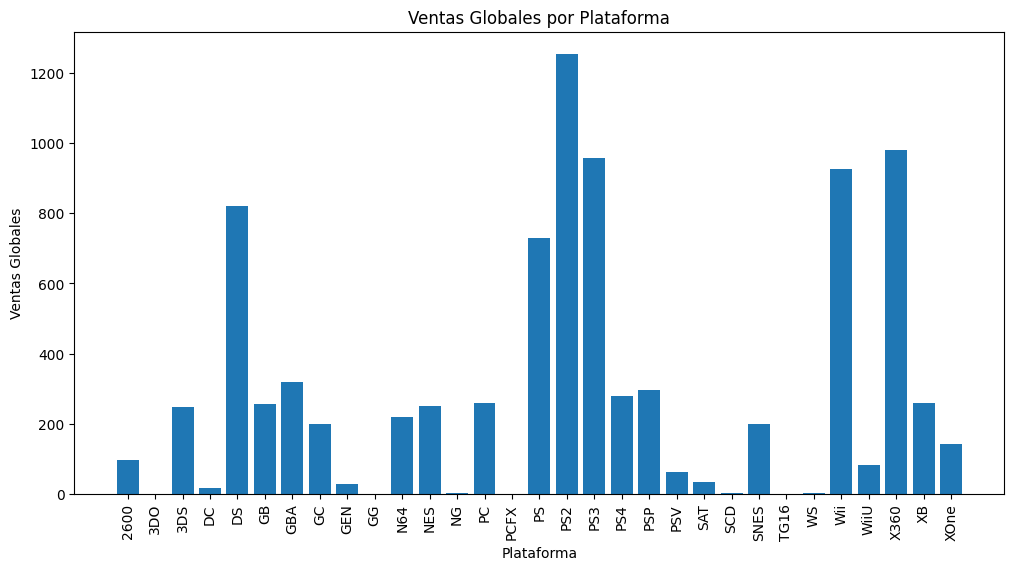

In [17]:
import matplotlib.pyplot as plt

# Configurar los datos de ventas por plataforma
plataformas = ventas_por_plataforma.index
ventas_globales = ventas_por_plataforma.values

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(plataformas, ventas_globales)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales por Plataforma')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


## Creación de nuevas características

Crea una nueva característica 'Sales_in_Millions' para hacer que las ventas sean más legibles, que muestre las ventas totales pero en millones.

In [18]:
# Crear la nueva característica 'Sales_in_Millions'
df['Sales_in_Millions'] = df['Global_Sales'] * 1000000

# Verificar los cambios
print(df.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Sales_in_Millions  
0     41.49     29.02      3.77         8.46         82.74         82740000.0  
1     29.08      3.58      6.81         0.77         40.24         40240000.0  
2     15.85     12.88      3.79         3.31         35.82         35820000.0  
3     15.75     11.01      3.28         2.96         33.00         33000000.0  
4     11.27      8.89     10.22         1.00         31.37         31370000.0  


## Agrupación avanzada:

Agrupa por 'Year' y 'Platform' y calcula las ventas totales.

In [19]:
# Agrupación por 'Year' y 'Platform' y cálculo de las ventas totales
ventas_totales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum()

# Verificar los resultados
print(ventas_totales)


Year    Platform
0.0     2600        10.51
        3DS          1.18
        DS           3.53
        GB           1.03
        GBA          4.94
                    ...  
2016.0  X360         0.83
        XOne        12.37
2017.0  PS4          0.03
        PSV          0.02
2020.0  DS           0.29
Name: Global_Sales, Length: 257, dtype: float64


## Tratamiento de columnas de texto

Transforma el género en una variable categórica numerada.


In [20]:
# Transformar la columna 'Genre' en una variable categórica numerada
df['Genre_Code'] = df['Genre'].astype('category').cat.codes

# Verificar los resultados
print(df[['Genre', 'Genre_Code']])


              Genre  Genre_Code
0            Sports          10
1          Platform           4
2            Racing           6
3            Sports          10
4      Role-Playing           7
...             ...         ...
16593      Platform           4
16594       Shooter           8
16595        Racing           6
16596        Puzzle           5
16597      Platform           4

[16598 rows x 2 columns]


## Correlación entre características

Examina la correlación entre las ventas en diferentes regiones utilizando la función corr() de pandas.

In [21]:
# Calcular la correlación entre las ventas en diferentes regiones
correlation = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

# Mostrar la matriz de correlación
print(correlation)


             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.767727  0.449787     0.634737
EU_Sales     0.767727  1.000000  0.435584     0.726385
JP_Sales     0.449787  0.435584  1.000000     0.290186
Other_Sales  0.634737  0.726385  0.290186     1.000000


## Operaciones con strings

Crea una nueva característica que contenga la primera letra del nombre del juego

In [22]:
# Crear una nueva columna 'First_Letter' con la primera letra del nombre del juego
df['First_Letter'] = df['Name'].str[0]

# Mostrar el DataFrame actualizado
print(df.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Sales_in_Millions  \
0     41.49     29.02      3.77         8.46         82.74         82740000.0   
1     29.08      3.58      6.81         0.77         40.24         40240000.0   
2     15.85     12.88      3.79         3.31         35.82         35820000.0   
3     15.75     11.01      3.28         2.96         33.00         33000000.0   
4     11.27      8.89     10.22         1.00         31.37         31370000.0   

   Genre_Code First_Letter  
0          10  

## Recuento

Cuenta cuántos juegos comienzan con cada letra.


In [23]:
# Contar cuántos juegos comienzan con cada letra
letter_counts = df['First_Letter'].value_counts()

# Mostrar el resultado
print(letter_counts)


S    1909
T    1755
M    1430
D    1252
N     924
B     891
C     880
P     860
F     772
R     717
A     667
G     608
W     604
H     535
L     449
K     416
J     403
E     283
I     238
O     190
Y     153
V     152
U     151
Z      93
X      84
1      27
Q      27
2      24
3      12
7      11
4      10
0      10
.      10
i       7
5       7
p       6
d       5
[       5
e       4
t       4
u       3
9       2
n       2
'       1
w       1
6       1
¡       1
f       1
h       1
Name: First_Letter, dtype: int64


## Ordenación de datos

Ordena el DataFrame por ventas globales en orden descendente.

In [24]:
# Ordenar el DataFrame por ventas globales en orden descendente
df_sorted = df.sort_values(by='Global_Sales', ascending=False)

# Mostrar el DataFrame ordenado
print(df_sorted)


        Rank                                  Name Platform    Year  \
0          1                            Wii Sports      Wii  2006.0   
1          2                     Super Mario Bros.      NES  1985.0   
2          3                        Mario Kart Wii      Wii  2008.0   
3          4                     Wii Sports Resort      Wii  2009.0   
4          5              Pokemon Red/Pokemon Blue       GB  1996.0   
...      ...                                   ...      ...     ...   
16186  16189                           BattleForge       PC  2009.0   
16187  16190                        Jewel Quest II       PC  2007.0   
16188  16191                      Toro to Morimori      PS3  2009.0   
16189  16192  Sonic & All-Stars Racing Transformed       PC  2013.0   
16597  16600                      Spirits & Spells      GBA  2003.0   

              Genre                    Publisher  NA_Sales  EU_Sales  \
0            Sports                     Nintendo     41.49     29.02   
1  

## Reset de índice

Si en algún momento hemos filtrado el DataFrame o lo hemos alterado de manera que el índice ya no es una secuencia continua de enteros, puede ser útil restablecer el índice.


In [25]:
# Restablecer el índice del DataFrame
df_reset = df.reset_index(drop=True)

# Mostrar el DataFrame con el índice restablecido
print(df_reset)


        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

## Eliminación de columnas innecesarias

Podemos eliminar columnas que no necesitaremos para futuros análisis. Por ejemplo, podemos eliminar la columna 'Rank'.


In [26]:
# Eliminar la columna 'Rank'
df = df.drop('Rank', axis=1)

# Mostrar el DataFrame actualizado
print(df)


                                                   Name Platform    Year  \
0                                            Wii Sports      Wii  2006.0   
1                                     Super Mario Bros.      NES  1985.0   
2                                        Mario Kart Wii      Wii  2008.0   
3                                     Wii Sports Resort      Wii  2009.0   
4                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16594                     Men in Black II: Alien Escape       GC  2003.0   
16595  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16596                                        Know How 2       DS  2010.0   
16597                                  Spirits & Spells      GBA  2003.0   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0        

## Identificación de Outliers

Podemos usar el método del rango intercuartil (IQR) para detectar outliers en la columna 'Global_Sales'.

Elimina los outliers u obtén un dataframe sin outliers en la columna GlobalSales.

In [27]:
# Calcular los valores del primer y tercer cuartil:
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)

In [28]:
# Calcular el rango intercuartil (IQR):
IQR = Q3 - Q1

In [29]:
# Definir los límites inferior y superior para identificar los outliers:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [30]:
# Filtrar el DataFrame para eliminar los outliers:
df_without_outliers = df[(df['Global_Sales'] >= lower_bound) & (df['Global_Sales'] <= upper_bound)]


## Uso de apply para operaciones de columna

Supongamos que queremos crear una nueva columna que sea GlobalSales pero con el IVA añadido, por ejemplo global_sales_iva

In [31]:
# Definir una función para calcular el valor con el IVA añadido
def add_iva(value):
    iva = value * 0.16  # Supongamos que el IVA es del 16%
    return value + iva

# Aplicar la función a la columna 'Global_Sales' y crear una nueva columna 'global_sales_iva'
df['global_sales_iva'] = df['Global_Sales'].apply(add_iva)

In [32]:
# Definir una función para calcular el valor con el IVA añadido
def add_iva(value):
    iva = value * 0.16  # Supongamos que el IVA es del 16%
    return value + iva

# Aplicar la función a la columna 'Global_Sales' y crear una nueva columna 'global_sales_iva'
df['global_sales_iva'] = df['Global_Sales'].apply(add_iva)

# Mostrar el DataFrame con la nueva columna
print(df)


                                                   Name Platform    Year  \
0                                            Wii Sports      Wii  2006.0   
1                                     Super Mario Bros.      NES  1985.0   
2                                        Mario Kart Wii      Wii  2008.0   
3                                     Wii Sports Resort      Wii  2009.0   
4                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16594                     Men in Black II: Alien Escape       GC  2003.0   
16595  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16596                                        Know How 2       DS  2010.0   
16597                                  Spirits & Spells      GBA  2003.0   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0        

## Uso de iloc para seleccionar datos

iloc es útil para seleccionar filas y columnas por posición. Por ejemplo, si queremos seleccionar las primeras 5 filas y las primeras 3 columnas.


In [33]:
# Seleccionar las primeras 5 filas y las primeras 3 columnas
subset = df.iloc[:5, :3]

# Mostrar el subset de datos seleccionado
print(subset)


                       Name Platform    Year
0                Wii Sports      Wii  2006.0
1         Super Mario Bros.      NES  1985.0
2            Mario Kart Wii      Wii  2008.0
3         Wii Sports Resort      Wii  2009.0
4  Pokemon Red/Pokemon Blue       GB  1996.0


## Guardar DataFrame

Finalmente, guardamos el DataFrame con todas las nuevas características y transformaciones en un nuevo archivo CSV.


In [35]:
# Guardar el DataFrame en un nuevo archivo CSV
df.to_csv(r'C:\\Users\\Jholman Cuartas\\Desktop\\curso_analisis_Jholman_cuartas\\data\\vgsales.csv', index=False)